**Description**: Analyze accuracies for $m = 50, n = 50$ where GPT-2 was pretrained for
2 epochs instead of 1.

**Estimated runtime**: 1 hour 

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join("..", "..")))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 50
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_gpt2_epochs_2")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

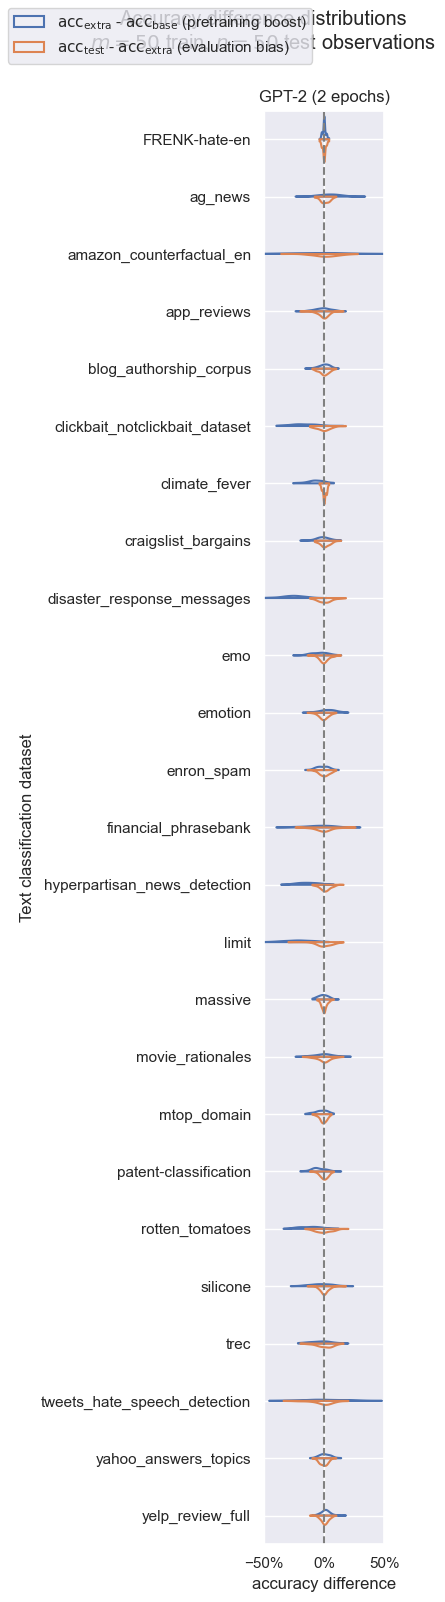

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.047384 ┆ 0.015096 │
└───────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",1.6653e-18,0.001421
"""ag_news""",0.0466,0.009329
"""amazon_counter…",-0.0434,0.021794
"""app_reviews""",-0.0116,0.006853
"""blog_authorshi…",-0.001,0.005072
…,…,…
"""silicone""",-0.0248,0.009476
"""trec""",-0.0338,0.009228
"""tweets_hate_sp…",-5.5511e-18,0.016963
"""yahoo_answers_…",0.005,0.004751


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",0.000461,0.00309
"""ag_news""",0.210987,0.039551
"""amazon_counter…",0.042699,0.055729
"""app_reviews""",0.011969,0.055062
"""blog_authorshi…",0.004113,0.009788
…,…,…
"""silicone""",-0.032525,0.030901
"""trec""",-0.009246,0.066107
"""tweets_hate_sp…",0.095124,0.045359
"""yahoo_answers_…",0.179298,0.061834


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 856 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],-0.10848,0.20625,-0.42400,0.22160,0.00485,0.00343,1810.59717,2214.31045,1.00097
1|dataset:method[FRENK-hate-en:extra],0.15072,0.20452,-0.17897,0.45895,0.00477,0.00342,1830.97312,2072.97129,1.00155
1|dataset:method[ag_news:base],-0.22514,0.19946,-0.52898,0.09791,0.00440,0.00311,2045.99678,2420.90364,1.00046
1|dataset:method[ag_news:extra],0.24030,0.20184,-0.09095,0.54892,0.00467,0.00365,1865.47408,2268.04668,1.00035
1|dataset:method[amazon_counterfactual_en:base],-0.01567,0.20391,-0.33929,0.30389,0.00465,0.00444,1915.83158,2067.30970,1.00281
1|dataset:method[amazon_counterfactual_en:extra],0.06889,0.20439,-0.27518,0.38200,0.00466,0.00433,1953.44510,1631.84616,1.00275
1|dataset:method[app_reviews:base],-0.11353,0.20222,-0.40429,0.24742,0.00440,0.00345,2104.16180,2195.89302,1.00053
1|dataset:method[app_reviews:extra],0.05509,0.19990,-0.26149,0.36953,0.00428,0.00319,2185.00976,2408.53243,1.00131
1|dataset:method[blog_authorship_corpus:base],-0.10439,0.20358,-0.41708,0.22575,0.00434,0.00324,2196.57009,2519.69188,1.00083
1|dataset:method[blog_authorship_corpus:extra],0.15280,0.20434,-0.16742,0.48938,0.00431,0.00305,2237.84831,2439.24730,1.00094


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


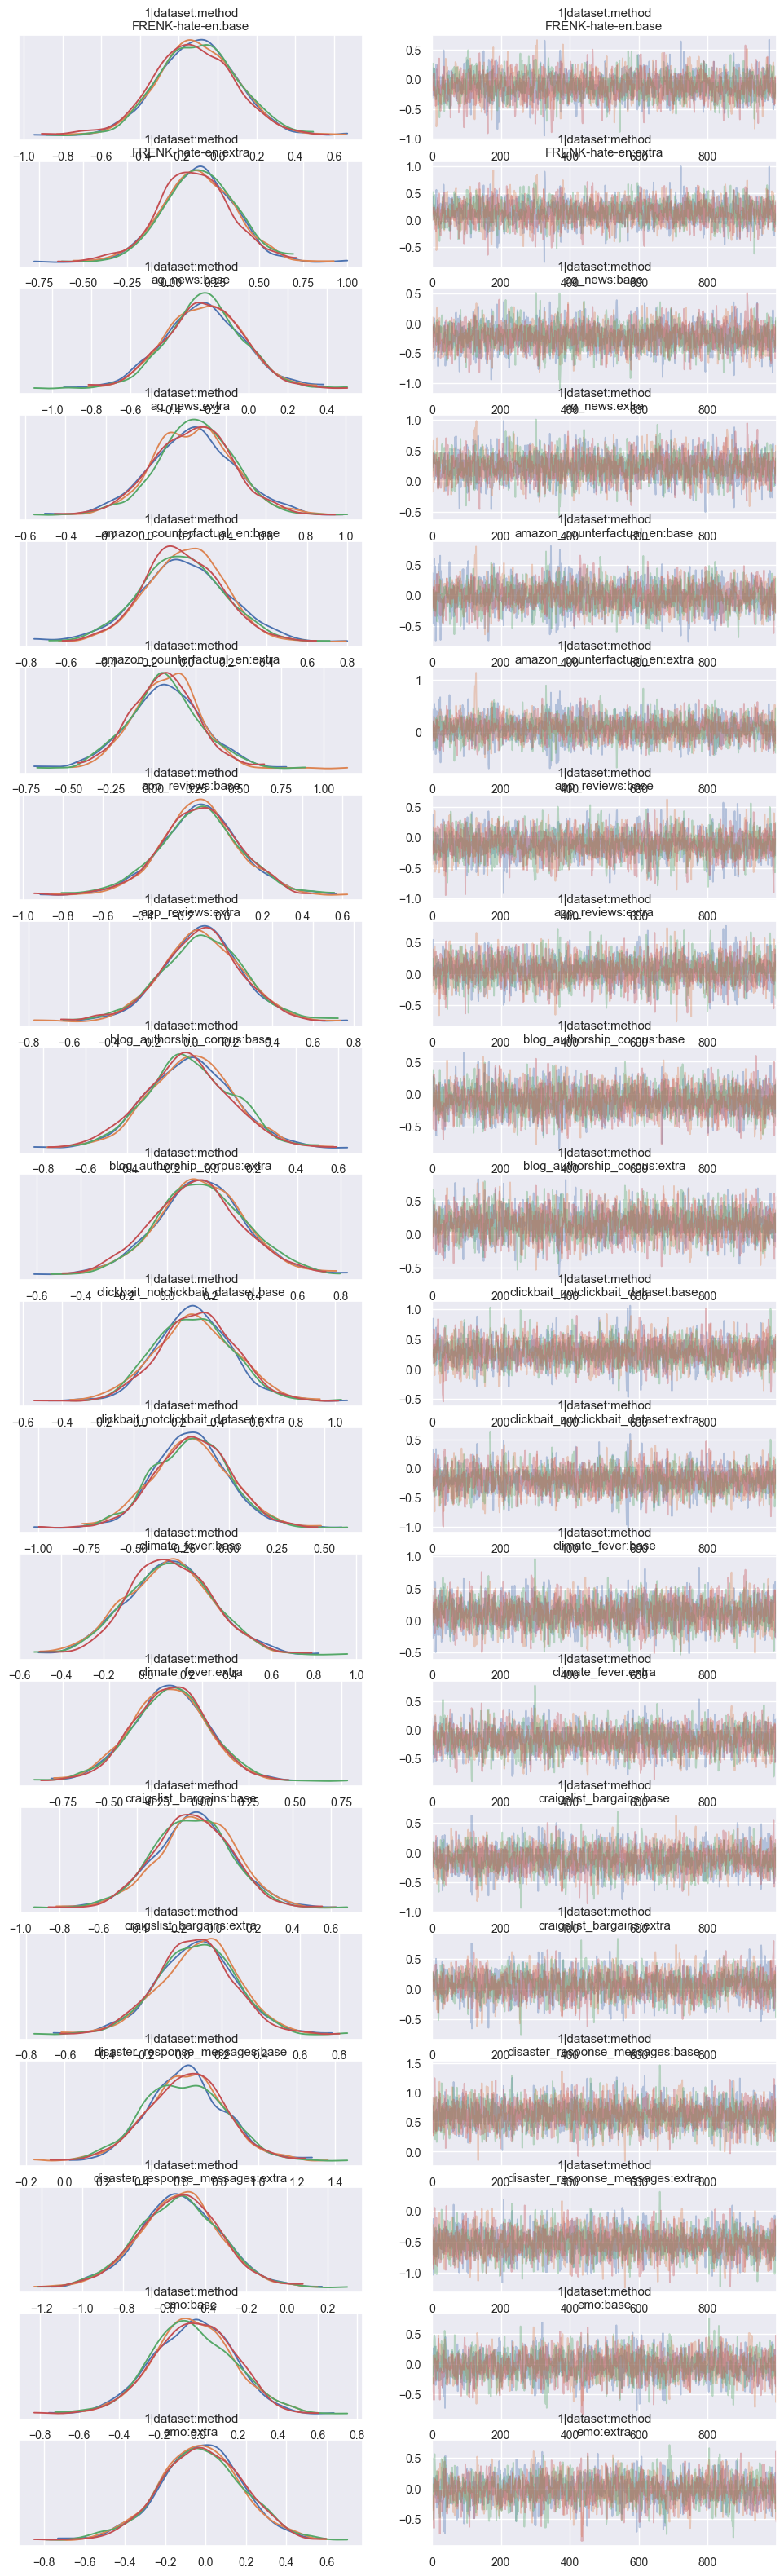

In [10]:
model_boost, summary_boost, az_summary_boost = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001256 ┆ 0.001251 │
└──────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.001,0.001738
"""ag_news""",0.0074,0.00381
"""amazon_counter…",0.0178,0.010154
"""app_reviews""",-0.0044,0.004879
"""blog_authorshi…",-0.0002,0.004134
…,…,…
"""silicone""",0.0036,0.00423
"""trec""",0.0038,0.006785
"""tweets_hate_sp…",-0.0108,0.009266
"""yahoo_answers_…",-0.0054,0.003421


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00085,0.003666
"""ag_news""",0.024355,0.011114
"""amazon_counter…",0.058247,0.023307
"""app_reviews""",inf,NaN
"""blog_authorshi…",0.0022,0.008063
…,…,…
"""silicone""",0.01825,0.013897
"""trec""",0.080027,0.03592
"""tweets_hate_sp…",-0.009674,0.017315
"""yahoo_answers_…",0.036953,0.047202


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 897 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],0.00050,0.00945,-0.01429,0.01353,0.00014,0.00012,5697.23728,3403.81106,1.00145
1|dataset:method[FRENK-hate-en:test],-0.00038,0.00910,-0.01373,0.01311,0.00013,0.00011,5639.43511,3660.51825,1.00064
1|dataset:method[ag_news:extra],-0.00109,0.00925,-0.01571,0.01188,0.00014,0.00012,5681.56160,3146.47717,1.00035
1|dataset:method[ag_news:test],0.00096,0.00921,-0.01219,0.01522,0.00013,0.00011,6508.55298,3390.58666,1.00110
1|dataset:method[amazon_counterfactual_en:extra],-0.00284,0.00962,-0.01685,0.01033,0.00015,0.00012,4579.42151,3021.51444,1.00112
1|dataset:method[amazon_counterfactual_en:test],0.00302,0.00978,-0.01092,0.01783,0.00016,0.00014,4425.82331,3303.74053,1.00074
1|dataset:method[app_reviews:extra],0.00110,0.00995,-0.01420,0.01562,0.00014,0.00012,5560.93617,3245.61274,1.00067
1|dataset:method[app_reviews:test],-0.00101,0.00972,-0.01567,0.01343,0.00013,0.00013,5689.58857,3199.29157,1.00072
1|dataset:method[blog_authorship_corpus:extra],0.00070,0.00908,-0.01291,0.01529,0.00013,0.00011,5600.82759,3584.71971,1.00103
1|dataset:method[blog_authorship_corpus:test],-0.00032,0.00901,-0.01531,0.01205,0.00013,0.00013,5346.55555,3379.05511,1.00005


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


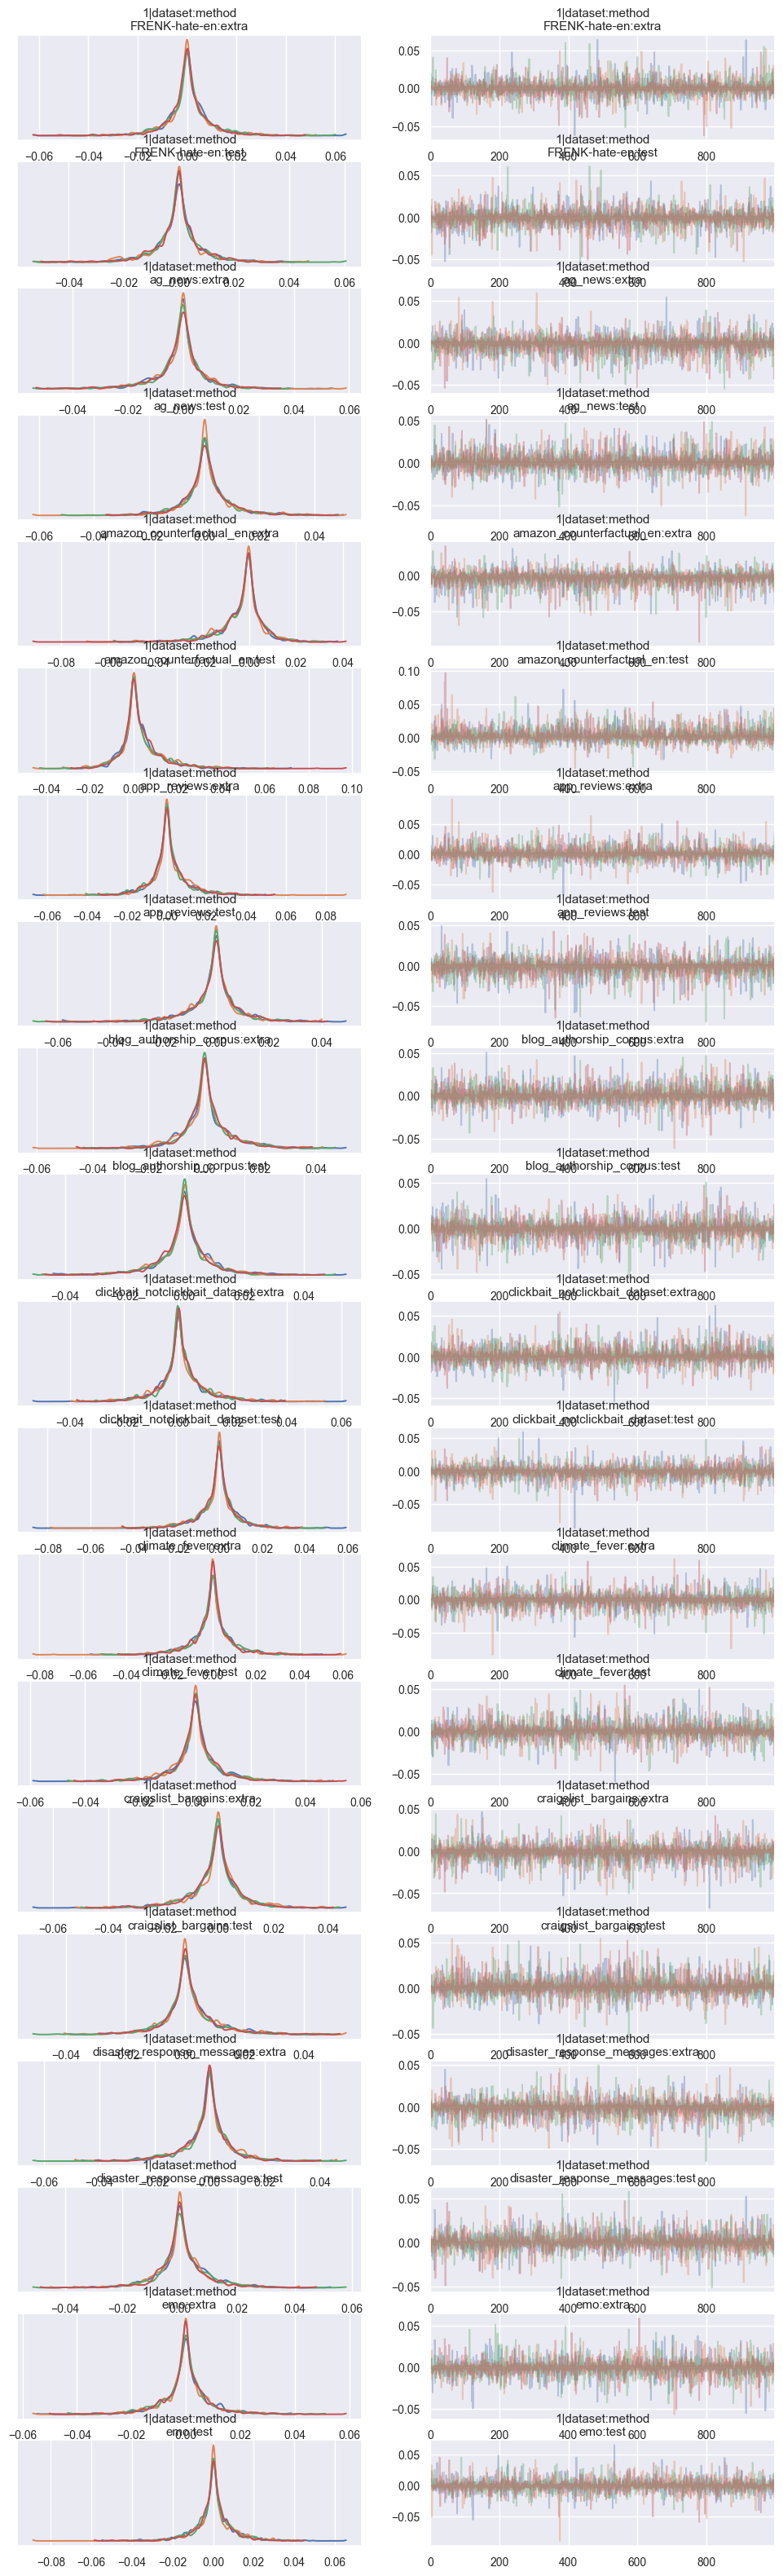

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", "gpt2-epochs-2", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/gpt2-epochs-2/m50/main_m50_n50_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/gpt2-epochs-2/m50/main_m50_n50_bias.nc'